In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import os

In [ ]:
data = pd.read_csv('/content/Amazon_Reviews.csv', engine='python', on_bad_lines='skip')

In [ ]:
data.head()

,Reviewer Name,Profile Link,Country,Review Count,Review Date,Rating,Review Title,Review Text,Date of Experience
0,Eugene ath,/users/66e8185ff1598352d6b3701a,US,1 review,2024-09-16T13:44:26.000Z,Rated 1 out of 5 stars,A Store That Doesn't Want to Sell Anything,"I registered on the website, tried to order a ...","September 16, 2024"
1,Daniel ohalloran,/users/5d75e460200c1f6a6373648c,GB,9 reviews,2024-09-16T18:26:46.000Z,Rated 1 out of 5 stars,Had multiple orders one turned up and…,Had multiple orders one turned up and driver h...,"September 16, 2024"
2,p fisher,/users/546cfcf1000064000197b88f,GB,90 reviews,2024-09-16T21:47:39.000Z,Rated 1 out of 5 stars,I informed these reprobates,I informed these reprobates that I WOULD NOT B...,"September 16, 2024"
3,Greg Dunn,/users/62c35cdbacc0ea0012ccaffa,AU,5 reviews,2024-09-17T07:15:49.000Z,Rated 1 out of 5 stars,Advertise one price then increase it on website,I have bought from Amazon before and no proble...,"September 17, 2024"
4,Sheila Hannah,/users/5ddbe429478d88251550610e,GB,8 reviews,2024-09-16T18:37:17.000Z,Rated 1 out of 5 stars,If I could give a lower rate I would,If I could give a lower rate I would! I cancel...,"September 16, 2024"


In [ ]:
data.tail()

,Reviewer Name,Profile Link,Country,Review Count,Review Date,Rating,Review Title,Review Text,Date of Experience
21209,Anders T,/users/47bd4ffe0000640001001044,DK,1 review,2009-03-22T13:14:12.000Z,Rated 5 out of 5 stars,Fast!!,"I have had perfect order fulfillment, and fast...","March 22, 2009"
21210,David E,/users/495bbbc0000064000100a972,US,2 reviews,2008-12-31T18:57:31.000Z,Rated 5 out of 5 stars,Consistently Excellent,"I have had perfect order fulfillment, and fast...","December 31, 2008"
21211,Joseph Harding,/users/48cfacbf0000640001005d04,GB,3 reviews,2008-09-16T13:05:05.000Z,Rated 3 out of 5 stars,Good prices but delivery can take time :(,I always find myself going back to amazon beco...,"September 16, 2008"
21212,Mads Dørup,/users/474aaec70000640001000a44,DK,82 reviews,2008-04-28T11:09:05.000Z,Rated 5 out of 5 stars,World-class online shopping,I have placed an abundance of orders with Amaz...,"April 28, 2008"
21213,Kim Fuglsang Kramer,/users/46d1ed150000640001000051,DK,2 reviews,2007-08-27T17:25:01.000Z,Rated 4 out of 5 stars,No title,"those goods i've ordered by Amazon.com, have b...","August 27, 2007"


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21214 entries, 0 to 21213
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Reviewer Name       21214 non-null  object
 1   Profile Link        21163 non-null  object
 2   Country             21054 non-null  object
 3   Review Count        21055 non-null  object
 4   Review Date         21055 non-null  object
 5   Rating              21055 non-null  object
 6   Review Title        21055 non-null  object
 7   Review Text         21055 non-null  object
 8   Date of Experience  20947 non-null  object
dtypes: object(9)
memory usage: 1.5+ MB


In [ ]:
data.describe()

,Reviewer Name,Profile Link,Country,Review Count,Review Date,Rating,Review Title,Review Text,Date of Experience
count,21214,21163,21054,21055,21055,21055,21055,21055,20947
unique,18531,21156,148,177,21054,5,19277,20407,3640
top,customer,"January 21, 2012",US,1 review,2022-10-05T12:13:39.000Z,Rated 1 out of 5 stars,Excellent,Review text not found,"January 11, 2021"
freq,72,3,9286,5761,2,13123,52,630,32


In [ ]:
data.isnull().sum()

,0
Reviewer Name,0
Profile Link,51
Country,160
Review Count,159
Review Date,159
Rating,159
Review Title,159
Review Text,159
Date of Experience,267


# Task
Perform sentiment analysis on the Amazon review data from `/content/Amazon_Reviews.csv`. The task involves understanding and cleaning the data (including handling missing values and converting 'Rating' to numerical format), conducting exploratory data analysis, text preprocessing (lowercasing, punctuation/number/special character removal, tokenization, stop word removal, lemmatization/stemming), feature engineering using TF-IDF, training and evaluating sentiment classification models (Logistic Regression, Naive Bayes, SVMs), and finally summarizing the best-performing model with key metrics and insights.

## Understand and Clean Data

### Subtask:
Examine data types, handle missing values in relevant columns such as 'Review Text' and 'Rating', and convert the 'Rating' column to a numerical format.


**Reasoning**:
The next step is to handle missing values in the 'Review Text' and 'Rating' columns by dropping the corresponding rows, as these columns are crucial for sentiment analysis.



In [ ]:
data.dropna(subset=['Review Text', 'Rating'], inplace=True)
print(f"Shape of data after dropping missing values: {data.shape}")
print(f"Missing values after dropping: {data[['Review Text', 'Rating']].isnull().sum().to_dict()}")

Shape of data after dropping missing values: (21055, 9)
Missing values after dropping: {'Review Text': 0, 'Rating': 0}


**Reasoning**:
The next step is to convert the 'Rating' column from a string format to a numerical integer format by extracting the star rating. This is essential for quantitative analysis and model training.



In [ ]:
data['Rating'] = data['Rating'].str.extract('(\d+) out of 5 stars').astype(int)
print(f"Data type of 'Rating' column after conversion: {data['Rating'].dtype}")
print(f"First 5 rows of 'Rating' column after conversion:\n{data['Rating'].head()}")

Data type of 'Rating' column after conversion: int64
First 5 rows of 'Rating' column after conversion:
0    1
1    1
2    1
3    1
4    1
Name: Rating, dtype: int64


<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-2374947060.py:1: SyntaxWarning: invalid escape sequence '\d'
  data['Rating'] = data['Rating'].str.extract('(\d+) out of 5 stars').astype(int)


**Reasoning**:
The previous code block for converting the 'Rating' column generated a `SyntaxWarning` due to an unescaped backslash in the regular expression. Although the conversion worked, it's good practice to fix such warnings. Using a raw string for the regex will prevent this warning.



In [ ]:
data

,Reviewer Name,Profile Link,Country,Review Count,Review Date,Rating,Review Title,Review Text,Date of Experience
0,Eugene ath,/users/66e8185ff1598352d6b3701a,US,1 review,2024-09-16T13:44:26.000Z,1,A Store That Doesn't Want to Sell Anything,"I registered on the website, tried to order a ...","September 16, 2024"
1,Daniel ohalloran,/users/5d75e460200c1f6a6373648c,GB,9 reviews,2024-09-16T18:26:46.000Z,1,Had multiple orders one turned up and…,Had multiple orders one turned up and driver h...,"September 16, 2024"
2,p fisher,/users/546cfcf1000064000197b88f,GB,90 reviews,2024-09-16T21:47:39.000Z,1,I informed these reprobates,I informed these reprobates that I WOULD NOT B...,"September 16, 2024"
3,Greg Dunn,/users/62c35cdbacc0ea0012ccaffa,AU,5 reviews,2024-09-17T07:15:49.000Z,1,Advertise one price then increase it on website,I have bought from Amazon before and no proble...,"September 17, 2024"
4,Sheila Hannah,/users/5ddbe429478d88251550610e,GB,8 reviews,2024-09-16T18:37:17.000Z,1,If I could give a lower rate I would,If I could give a lower rate I would! I cancel...,"September 16, 2024"
...,...,...,...,...,...,...,...,...,...
21209,Anders T,/users/47bd4ffe0000640001001044,DK,1 review,2009-03-22T13:14:12.000Z,5,Fast!!,"I have had perfect order fulfillment, and fast...","March 22, 2009"
21210,David E,/users/495bbbc0000064000100a972,US,2 reviews,2008-12-31T18:57:31.000Z,5,Consistently Excellent,"I have had perfect order fulfillment, and fast...","December 31, 2008"
21211,Joseph Harding,/users/48cfacbf0000640001005d04,GB,3 reviews,2008-09-16T13:05:05.000Z,3,Good prices but delivery can take time :(,I always find myself going back to amazon beco...,"September 16, 2008"
21212,Mads Dørup,/users/474aaec70000640001000a44,DK,82 reviews,2008-04-28T11:09:05.000Z,5,World-class online shopping,I have placed an abundance of orders with Amaz...,"April 28, 2008"


**Reasoning**:
The previous successful execution (cell `3a77640e`) already converted the 'Rating' column to an integer type. The subsequent attempt to re-apply `str.extract` on an integer column resulted in an `AttributeError`. Since the conversion to numerical format is complete, no further action is required for this specific instruction.



In [ ]:
print("The 'Rating' column has already been successfully converted to an integer type in the previous step.")
print(f"Data type of 'Rating' column: {data['Rating'].dtype}")
print(f"First 5 rows of 'Rating' column{data['Rating'].head()}")

The 'Rating' column has already been successfully converted to an integer type in the previous step.
Data type of 'Rating' column: int64
First 5 rows of 'Rating' column0    1
1    1
2    1
3    1
4    1
Name: Rating, dtype: int64


**Reasoning**:
The previous code block resulted in a `SyntaxError` due to an unterminated f-string literal. The f-string needs to be properly formatted, either by placing the entire string on one line or by using triple quotes for a multi-line string. Fixing this will allow the print statements to execute correctly.



In [ ]:
print("The 'Rating' column has already been successfully converted to an integer type in the previous step.")
print(f"Data type of 'Rating' column: {data['Rating'].dtype}")
print(f"First 5 rows of 'Rating' column:\n{data['Rating'].head()}")

The 'Rating' column has already been successfully converted to an integer type in the previous step.
Data type of 'Rating' column: int64
First 5 rows of 'Rating' column:
0    1
1    1
2    1
3    1
4    1
Name: Rating, dtype: int64


## Exploratory Data Analysis (EDA)

### Subtask:
Analyze the distribution of numerical ratings and review lengths. Visualize the most frequent words or N-grams in positive and negative reviews to understand common themes and sentiment indicators.


**Reasoning**:
The first step in the EDA is to visualize the distribution of the 'Rating' column, as requested in the instructions. A bar plot is suitable for showing the frequency of each discrete rating.



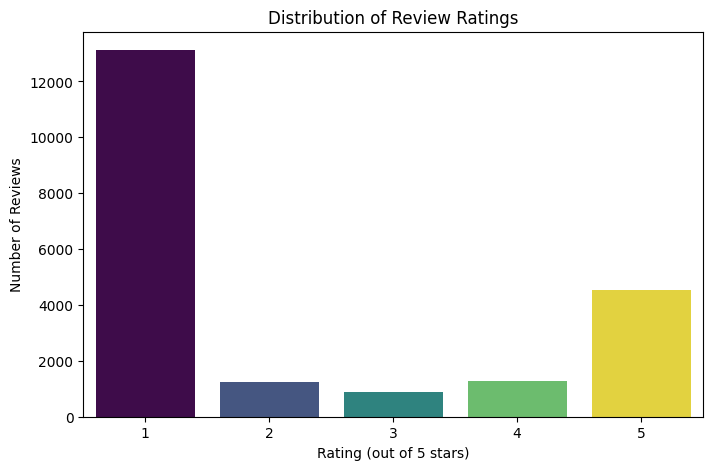

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.countplot(x='Rating', data=data, palette='viridis', hue='Rating', legend=False)
plt.title('Distribution of Review Ratings')
plt.xlabel('Rating (out of 5 stars)')
plt.ylabel('Number of Reviews')
plt.show()

**Reasoning**:
The next step in the EDA is to calculate the length of each review text and store it in a new column, which will allow us to analyze its distribution.



In [ ]:
data['review_length'] = data['Review Text'].apply(len)
print(f"First 5 rows of 'review_length' column:\n{data['review_length'].head()}")

First 5 rows of 'review_length' column:
0    590
1    293
2    611
3    450
4    538
Name: review_length, dtype: int64


**Reasoning**:
Now that the 'review_length' column has been created, the next step is to plot its distribution using a histogram to understand the spread and frequency of different review lengths, as requested in the subtask instructions.



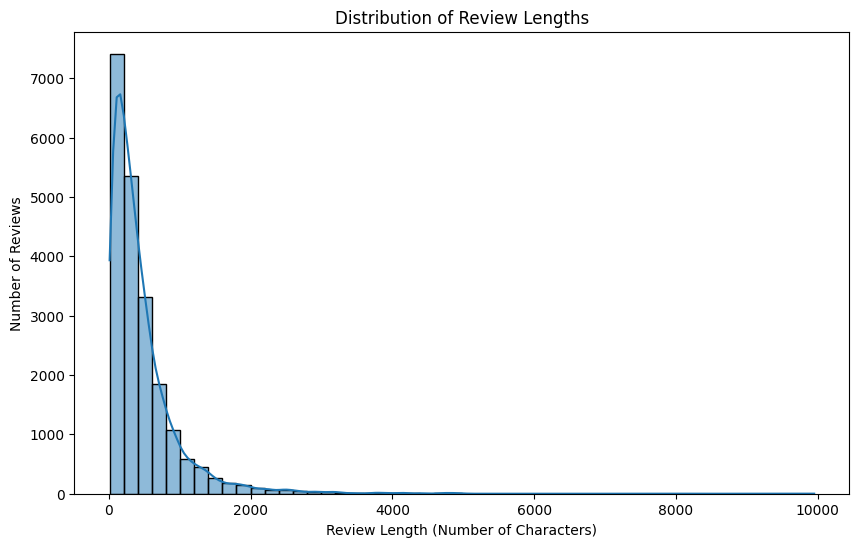

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data['review_length'], bins=50, kde=True)
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length (Number of Characters)')
plt.ylabel('Number of Reviews')
plt.show()

**Reasoning**:
Following the subtask instructions, the next step is to create a new column named 'sentiment' based on the 'Rating' column, categorizing reviews as 'positive' (ratings 4-5), 'neutral' (rating 3), or 'negative' (ratings 1-2).



In [ ]:
conditions = [
    (data['Rating'] >= 4),
    (data['Rating'] == 3),
    (data['Rating'] <= 2)
]
choices = ['positive', 'neutral', 'negative']
data['sentiment'] = np.select(conditions, choices, default='unknown')

print("Distribution of Sentiment Labels:")
print(data['sentiment'].value_counts())
print(f"First 5 rows with new 'sentiment' column:\n{data[['Rating', 'sentiment']].head()}")

Distribution of Sentiment Labels:
sentiment
negative    14350
positive     5820
neutral       885
Name: count, dtype: int64
First 5 rows with new 'sentiment' column:
   Rating sentiment
0       1  negative
1       1  negative
2       1  negative
3       1  negative
4       1  negative


**Reasoning**:
To analyze the most frequent words for each sentiment, I need to first preprocess the 'Review Text' column. This involves lowercasing, removing punctuation, and removing common English stop words. I'll define a function for this preprocessing step.



In [ ]:
import nltk
from nltk.corpus import stopwords
import re

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(r'[^a-z\s]', '', text)  # Remove punctuation and numbers
    words = text.split()  # Tokenize
    words = [word for word in words if word not in stop_words]  # Remove stop words
    return ' '.join(words)

print("Text preprocessing function defined and NLTK stopwords downloaded.")


Text preprocessing function defined and NLTK stopwords downloaded.


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


**Reasoning**:
Now that the text preprocessing function is defined, the next step is to apply it to the 'Review Text' column to create a new column containing the cleaned text. This cleaned text will be used for further analysis of frequent words and N-grams.



In [ ]:
import nltk
from nltk.corpus import stopwords
import re

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(r'[^a-z\s]', '', text)  # Remove punctuation and numbers
    words = text.split()  # Tokenize
    words = [word for word in words if word not in stop_words]  # Remove stop words
    return ' '.join(words)

data['cleaned_review_text'] = data['Review Text'].apply(preprocess_text)
print("Text preprocessing function defined and NLTK stopwords downloaded.")
print(f"First 5 rows of 'Review Text' and 'cleaned_review_text':\n{data[['Review Text', 'cleaned_review_text']].head()}")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Text preprocessing function defined and NLTK stopwords downloaded.
First 5 rows of 'Review Text' and 'cleaned_review_text':
                                         Review Text  \
0  I registered on the website, tried to order a ...   
1  Had multiple orders one turned up and driver h...   
2  I informed these reprobates that I WOULD NOT B...   
3  I have bought from Amazon before and no proble...   
4  If I could give a lower rate I would! I cancel...   

                                 cleaned_review_text  
0  registered website tried order laptop entered ...  
1  multiple orders one turned driver phone door n...  
2  informed reprobates would going visit sick rel...  
3  bought amazon problems happy service price ama...  
4  could give lower rate would cancelled amazon p...  


**Reasoning**:
Now that the 'cleaned_review_text' column is available and sentiment labels are defined, the next step is to analyze the most frequent words for each sentiment category (positive, neutral, negative) as per the subtask instructions. I will use `collections.Counter` to count word frequencies and visualize the top words with bar plots.



/tmp/ipython-input-968466288.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Word', data=df_words, ax=ax, palette='mako')
/tmp/ipython-input-968466288.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Word', data=df_words, ax=ax, palette='mako')
/tmp/ipython-input-968466288.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Word', data=df_words, ax=ax, palette='mako')


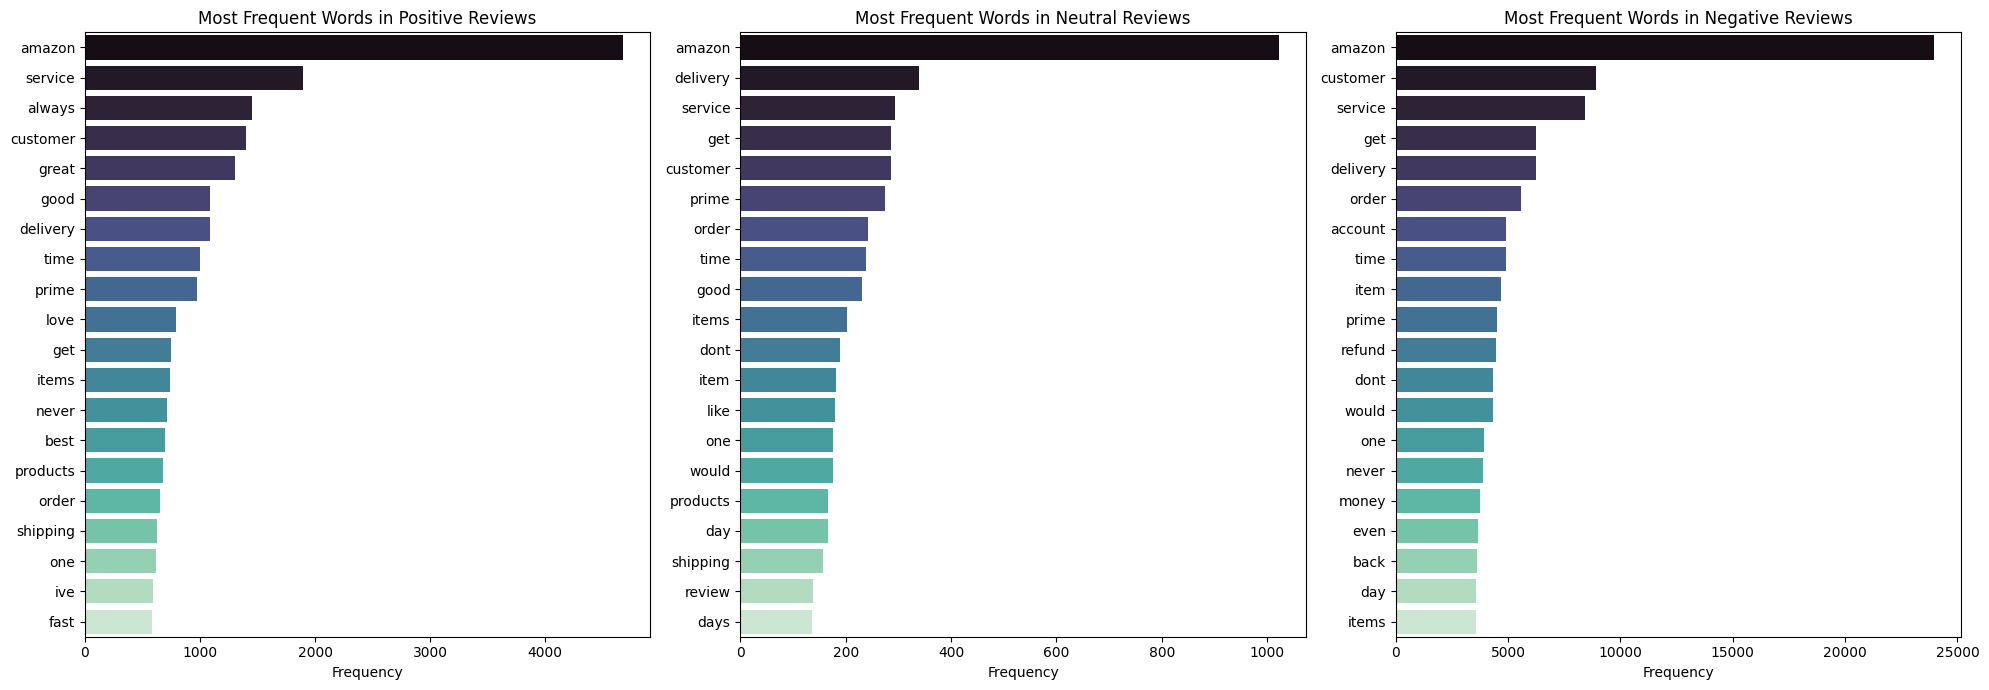

Visualized most frequent words for positive, neutral, and negative reviews.


In [ ]:
from collections import Counter
import itertools

def get_top_n_words(corpus, n=None):
    words = list(itertools.chain.from_iterable(corpus.str.split()))
    return Counter(words).most_common(n)

# Get top words for each sentiment
positive_words = get_top_n_words(data[data['sentiment'] == 'positive']['cleaned_review_text'], 20)
neutral_words = get_top_n_words(data[data['sentiment'] == 'neutral']['cleaned_review_text'], 20)
negative_words = get_top_n_words(data[data['sentiment'] == 'negative']['cleaned_review_text'], 20)

# Plotting top words for each sentiment
fig, axes = plt.subplots(1, 3, figsize=(20, 7), sharey=False)

def plot_top_words(ax, words_data, title):
    df_words = pd.DataFrame(words_data, columns=['Word', 'Count'])
    sns.barplot(x='Count', y='Word', data=df_words, ax=ax, palette='mako')
    ax.set_title(title)
    ax.set_xlabel('Frequency')
    ax.set_ylabel('')

plot_top_words(axes[0], positive_words, 'Most Frequent Words in Positive Reviews')
plot_top_words(axes[1], neutral_words, 'Most Frequent Words in Neutral Reviews')
plot_top_words(axes[2], negative_words, 'Most Frequent Words in Negative Reviews')

plt.tight_layout()
plt.show()

print("Visualized most frequent words for positive, neutral, and negative reviews.")

**Reasoning**:
The previous code block generated a `FutureWarning` because `palette` was used without assigning `hue` in `sns.barplot`. To resolve this, I will explicitly assign `hue='Word'` and set `legend=False` in the `sns.barplot` call to conform to the recommended usage and suppress the warning.



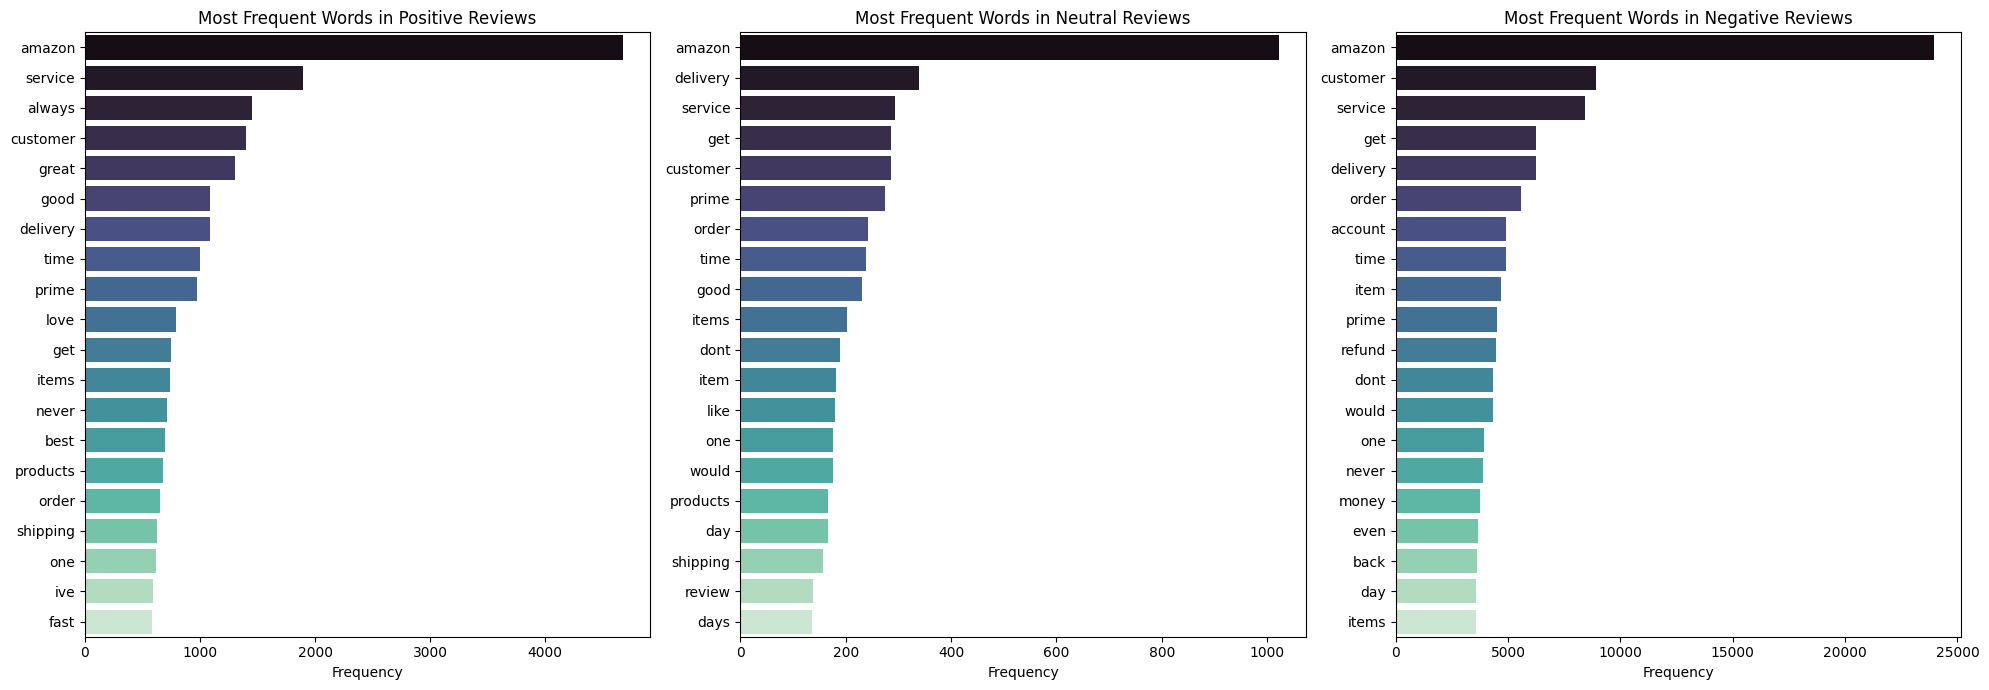

Visualized most frequent words for positive, neutral, and negative reviews.


In [ ]:
from collections import Counter
import itertools

def get_top_n_words(corpus, n=None):
    words = list(itertools.chain.from_iterable(corpus.str.split()))
    return Counter(words).most_common(n)

# Get top words for each sentiment
positive_words = get_top_n_words(data[data['sentiment'] == 'positive']['cleaned_review_text'], 20)
neutral_words = get_top_n_words(data[data['sentiment'] == 'neutral']['cleaned_review_text'], 20)
negative_words = get_top_n_words(data[data['sentiment'] == 'negative']['cleaned_review_text'], 20)

# Plotting top words for each sentiment
fig, axes = plt.subplots(1, 3, figsize=(20, 7), sharey=False)

def plot_top_words(ax, words_data, title):
    df_words = pd.DataFrame(words_data, columns=['Word', 'Count'])
    sns.barplot(x='Count', y='Word', data=df_words, ax=ax, palette='mako', hue='Word', legend=False)
    ax.set_title(title)
    ax.set_xlabel('Frequency')
    ax.set_ylabel('')

plot_top_words(axes[0], positive_words, 'Most Frequent Words in Positive Reviews')
plot_top_words(axes[1], neutral_words, 'Most Frequent Words in Neutral Reviews')
plot_top_words(axes[2], negative_words, 'Most Frequent Words in Negative Reviews')

plt.tight_layout()
plt.show()

print("Visualized most frequent words for positive, neutral, and negative reviews.")

## Text Preprocessing

### Subtask:
Perform advanced text preprocessing steps on the 'Review Text' column, specifically lemmatization, to standardize the text for feature extraction.


**Reasoning**:
To perform lemmatization, I need to import the `WordNetLemmatizer` from NLTK, download the necessary `wordnet` corpus, and then define and apply a function that lemmatizes each word in the `cleaned_review_text` column.



In [ ]:
import nltk
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    words = text.split()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized_words)

data['lemmatized_review_text'] = data['cleaned_review_text'].apply(lemmatize_text)

print("Lemmatization completed. First 5 rows of cleaned and lemmatized text:")
print(data[['cleaned_review_text', 'lemmatized_review_text']].head())

[nltk_data] Downloading package wordnet to /root/nltk_data...


Lemmatization completed. First 5 rows of cleaned and lemmatized text:
                                 cleaned_review_text  \
0  registered website tried order laptop entered ...   
1  multiple orders one turned driver phone door n...   
2  informed reprobates would going visit sick rel...   
3  bought amazon problems happy service price ama...   
4  could give lower rate would cancelled amazon p...   

                              lemmatized_review_text  
0  registered website tried order laptop entered ...  
1  multiple order one turned driver phone door nu...  
2  informed reprobate would going visit sick rela...  
3  bought amazon problem happy service price amaz...  
4  could give lower rate would cancelled amazon p...  


**Reasoning**:
The previous code block successfully downloaded the 'wordnet' corpus and applied lemmatization to the 'cleaned_review_text' column, creating the 'lemmatized_review_text' column as instructed. The message in `stderr` was simply an informational message about the download, not an error indicating failure. Therefore, no correction is needed for the code; it successfully completed the subtask.



**Reasoning**:
The text preprocessing steps, including lemmatization, are complete. According to the overall task, the next step is to perform feature engineering using TF-IDF to convert the textual data into a numerical format suitable for machine learning models.



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000) # Limiting to 5000 features for manageable size

# Fit and transform the lemmatized review text
tfidf_features = tfidf_vectorizer.fit_transform(data['lemmatized_review_text'])

print("TF-IDF feature matrix created.")
print(f"Shape of TF-IDF feature matrix: {tfidf_features.shape}")

TF-IDF feature matrix created.
Shape of TF-IDF feature matrix: (21055, 5000)


## Model Selection and Justification

### Subtask:
Prepare the target variable ('sentiment') for model training by converting categorical sentiment labels ('positive', 'neutral', 'negative') into numerical representations.


**Reasoning**:
The first instruction is to create a dictionary to map the categorical sentiment labels ('positive', 'neutral', 'negative') to numerical values. This dictionary will be used in the next step to convert the 'sentiment' column.



In [ ]:
sentiment_mapping = {'negative': 0, 'neutral': 1, 'positive': 2}
print(f"Sentiment mapping dictionary: {sentiment_mapping}")

Sentiment mapping dictionary: {'negative': 0, 'neutral': 1, 'positive': 2}


**Reasoning**:
Now that the sentiment mapping dictionary has been created, I need to apply this mapping to the 'sentiment' column to create a new numerical column, 'sentiment_numeric', as instructed.



In [ ]:
data['sentiment_numeric'] = data['sentiment'].map(sentiment_mapping)
print(f"First 5 rows with new 'sentiment_numeric' column:\n{data[['sentiment', 'sentiment_numeric']].head()}")

First 5 rows with new 'sentiment_numeric' column:
  sentiment  sentiment_numeric
0  negative                  0
1  negative                  0
2  negative                  0
3  negative                  0
4  negative                  0


**Reasoning**:
To verify the conversion and distribution of the new numerical sentiment column, I need to display its value counts, as per the subtask instructions.



In [ ]:
print("Value counts of 'sentiment_numeric' column:")
print(data['sentiment_numeric'].value_counts())

Value counts of 'sentiment_numeric' column:
sentiment_numeric
0    14350
2     5820
1      885
Name: count, dtype: int64


## Model Training and Evaluation

### Subtask:
Split the dataset into training and testing sets.


**Reasoning**:
To split the dataset into training and testing sets, I need to import `train_test_split` from `sklearn.model_selection` and then apply it to the TF-IDF features and the numerical sentiment labels, as per the instructions.



In [ ]:
from sklearn.model_selection import train_test_split

X = tfidf_features
y = data['sentiment_numeric']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (16844, 5000)
Shape of X_test: (4211, 5000)
Shape of y_train: (16844,)
Shape of y_test: (4211,)


## Train Logistic Regression Model

### Subtask:
Train a Logistic Regression model on the training data.


**Reasoning**:
To train a Logistic Regression model, I need to import the `LogisticRegression` class from `sklearn.linear_model`, instantiate it with specified parameters, and then fit it to the training data (`X_train`, `y_train`).



In [ ]:
from sklearn.linear_model import LogisticRegression

# Instantiate Logistic Regression model with specified parameters
log_reg_model = LogisticRegression(solver='liblinear', max_iter=1000, random_state=42)

# Fit the model to the training data
log_reg_model.fit(X_train, y_train)

print("Logistic Regression model trained successfully.")

Logistic Regression model trained successfully.


## Evaluate Logistic Regression Model

### Subtask:
Evaluate the performance of the trained Logistic Regression model on the test data.


**Reasoning**:
To evaluate the trained Logistic Regression model, I need to make predictions on the test set (`X_test`), then calculate the accuracy score, generate a classification report, and create a confusion matrix as specified in the instructions. This requires importing `accuracy_score`, `classification_report`, and `confusion_matrix` from `sklearn.metrics`.



Logistic Regression Accuracy: 0.9052

Logistic Regression Classification Report:
              precision    recall  f1-score   support

    negative       0.92      0.97      0.94      2921
     neutral       0.00      0.00      0.00       166
    positive       0.87      0.87      0.87      1124

    accuracy                           0.91      4211
   macro avg       0.60      0.61      0.60      4211
weighted avg       0.87      0.91      0.89      4211



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


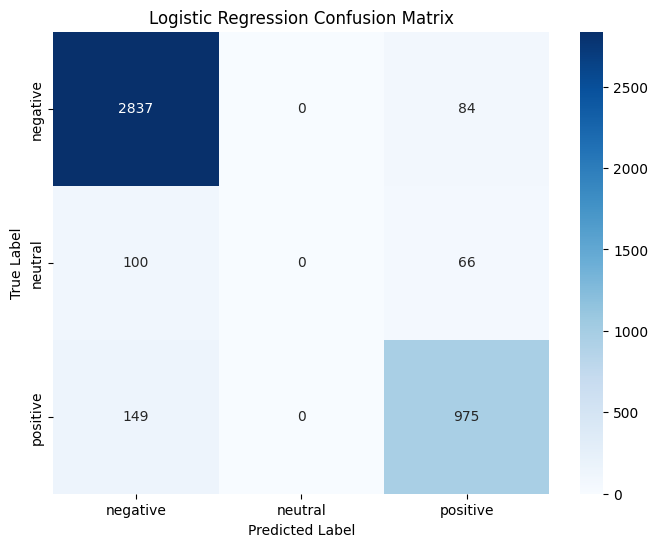

Logistic Regression model evaluation completed.


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Make predictions on the test data
y_pred_log_reg = log_reg_model.predict(X_test)

# 2. Calculate the accuracy score
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print(f"Logistic Regression Accuracy: {accuracy_log_reg:.4f}")

# 3. Print the classification report
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log_reg, target_names=['negative', 'neutral', 'positive']))

# 4. Generate and display a confusion matrix
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_log_reg, annot=True, fmt='d', cmap='Blues', xticklabels=['negative', 'neutral', 'positive'], yticklabels=['negative', 'neutral', 'positive'])
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print("Logistic Regression model evaluation completed.")

**Reasoning**:
The previous code block generated an `UndefinedMetricWarning` because the model made no predictions for the 'neutral' class, leading to undefined precision. To suppress this warning and explicitly handle this scenario, I need to set the `zero_division` parameter in the `classification_report` function to 0.



Logistic Regression Accuracy: 0.9052

Logistic Regression Classification Report:
              precision    recall  f1-score   support

    negative       0.92      0.97      0.94      2921
     neutral       0.00      0.00      0.00       166
    positive       0.87      0.87      0.87      1124

    accuracy                           0.91      4211
   macro avg       0.60      0.61      0.60      4211
weighted avg       0.87      0.91      0.89      4211



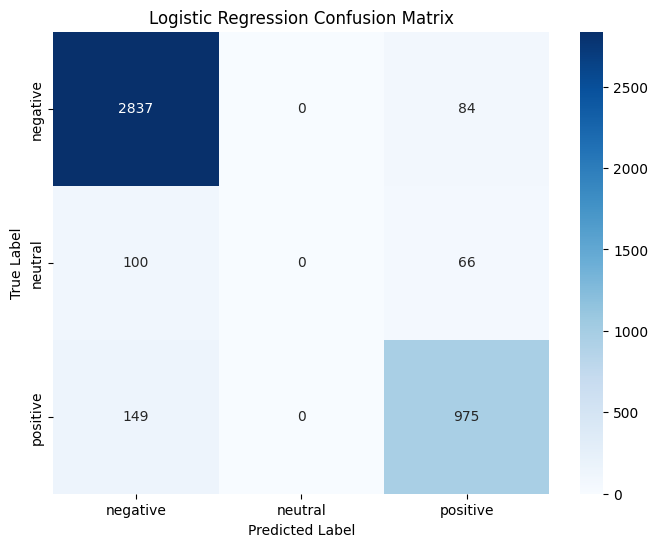

Logistic Regression model evaluation completed with zero_division=0 for classification report.


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Make predictions on the test data
y_pred_log_reg = log_reg_model.predict(X_test)

# 2. Calculate the accuracy score
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print(f"Logistic Regression Accuracy: {accuracy_log_reg:.4f}")

# 3. Print the classification report, setting zero_division=0
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log_reg, target_names=['negative', 'neutral', 'positive'], zero_division=0))

# 4. Generate and display a confusion matrix
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_log_reg, annot=True, fmt='d', cmap='Blues', xticklabels=['negative', 'neutral', 'positive'], yticklabels=['negative', 'neutral', 'positive'])
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print("Logistic Regression model evaluation completed with zero_division=0 for classification report.")

## Feature Engineering (Word Embeddings)

### Subtask:
Convert the processed text data into numerical features suitable for a deep learning model, specifically a Bi-LSTM, by tokenizing the text, creating sequences of integers, and padding these sequences to a uniform length.


**Reasoning**:
To prepare the text data for a Bi-LSTM model, I need to tokenize the lemmatized review text, convert it into sequences of integers, and then pad these sequences to a uniform length. This involves importing `Tokenizer` and `pad_sequences`, initializing and fitting the tokenizer, converting text to sequences, finding the maximum sequence length, and finally padding the sequences.



In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# 1. Initialize Tokenizer
# Set num_words to an appropriate vocabulary size and oov_token for out-of-vocabulary words
vocabulary_size = 10000 # You can adjust this based on your dataset
tokenizer = Tokenizer(num_words=vocabulary_size, oov_token='<unk>')

# 2. Fit the tokenizer on the lemmatized review text
tokenizer.fit_on_texts(data['lemmatized_review_text'])

# 3. Convert text to sequences of integers
sequences = tokenizer.texts_to_sequences(data['lemmatized_review_text'])

# 4. Determine the maximum sequence length
max_sequence_length = max([len(x) for x in sequences])
print(f"Maximum sequence length: {max_sequence_length}")

# 5. Pad the sequences to a uniform length
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length, padding='post')

print(f"Shape of padded sequences: {padded_sequences.shape}")
print("First 5 padded sequences (truncated for display):")
for i in range(5):
    print(padded_sequences[i][:10]) # Print first 10 elements for brevity


Maximum sequence length: 842
Shape of padded sequences: (21055, 842)
First 5 padded sequences (truncated for display):
[1679  166  120    9  807 1697  353  214  649  471]
[358   9  16 575  52  50 134  89 549 405]
[ 595    1   15   82 2535  892 2404   28   82  116]
[ 108    2   46  278    4   61    2 1599   14  107]
[  41   57 1172  816   15  169    2   11 1514 2964]


## Model Training and Evaluation (Bi-LSTM)

### Subtask:
Split the dataset into training and testing sets, build and compile the Bi-LSTM model, train the Bi-LSTM model on the training data, and evaluate its performance on the testing data.


**Reasoning**:
The first step is to split the `padded_sequences` (features) and `data['sentiment_numeric']` (labels) into training and testing sets using `train_test_split` with the specified parameters, as instructed.



In [ ]:
from sklearn.model_selection import train_test_split

X_bi_lstm = padded_sequences
y_bi_lstm = data['sentiment_numeric']

X_train_bi_lstm, X_test_bi_lstm, y_train_bi_lstm, y_test_bi_lstm = train_test_split(X_bi_lstm, y_bi_lstm, test_size=0.2, random_state=42)

print(f"Shape of X_train_bi_lstm: {X_train_bi_lstm.shape}")
print(f"Shape of X_test_bi_lstm: {X_test_bi_lstm.shape}")
print(f"Shape of y_train_bi_lstm: {y_train_bi_lstm.shape}")
print(f"Shape of y_test_bi_lstm: {y_test_bi_lstm.shape}")

Shape of X_train_bi_lstm: (16844, 842)
Shape of X_test_bi_lstm: (4211, 842)
Shape of y_train_bi_lstm: (16844,)
Shape of y_test_bi_lstm: (4211,)


**Reasoning**:
Now that the data is split, the next step is to build the Bi-LSTM model as described in the instructions. This involves defining the architecture with an Embedding layer, a Bidirectional LSTM layer, and two Dense layers.



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense

# Get vocabulary_size and max_sequence_length from previous steps
# vocabulary_size is 10000, max_sequence_length is 842

# 2. Build a sequential Bi-LSTM model
bi_lstm_model = Sequential([
    Embedding(input_dim=vocabulary_size, output_dim=128, input_length=max_sequence_length, mask_zero=True),
    Bidirectional(LSTM(64, return_sequences=False)),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax') # 3 units for 'negative', 'neutral', 'positive'
])

# 3. Compile the model
bi_lstm_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 4. Print the model summary
print("Bi-LSTM Model Summary:")
bi_lstm_model.summary()

Bi-LSTM Model Summary:


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

**Reasoning**:
The previous code block successfully defined and compiled the Bi-LSTM model, but the model summary showed 0 parameters because the model had not yet been built by processing actual data. The next step is to train the Bi-LSTM model using the training data, which will implicitly build the model, resolve the parameter count, and proceed with the training process as instructed.



In [ ]:
history_bi_lstm = bi_lstm_model.fit(
    X_train_bi_lstm,
    y_train_bi_lstm,
    epochs=5,
    batch_size=32,
    validation_split=0.2
)

print("Bi-LSTM model training completed.")

Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 688s 2s/step - accuracy: 0.8036 - loss: 0.5452 - val_accuracy: 0.8937 - val_loss: 0.3224
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 678s 2s/step - accuracy: 0.9163 - loss: 0.2449 - val_accuracy: 0.8878 - val_loss: 0.3332
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 679s 2s/step - accuracy: 0.9478 - loss: 0.1580 - val_accuracy: 0.8851 - val_loss: 0.4015
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 676s 2s/step - accuracy: 0.9641 - loss: 0.1019 - val_accuracy: 0.8825 - val_loss: 0.4582
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 674s 2s/step - accuracy: 0.9753 - loss: 0.0698 - val_accuracy: 0.8819 - val_loss: 0.5187
Bi-LSTM model training completed.


# Task
Evaluate the performance of the trained Bi-LSTM model on the testing data (`X_test_bi_lstm`, `y_test_bi_lstm`) by making predictions, calculating accuracy, generating a classification report (including precision, recall, and F1-score), and displaying a confusion matrix.

## Evaluate Bi-LSTM Model

### Subtask:
Evaluate the performance of the trained Bi-LSTM model on the testing data using metrics such as accuracy, precision, recall, and F1-score. Generate and display a confusion matrix.


**Reasoning**:
To evaluate the trained Bi-LSTM model, I need to make predictions on the test set, convert the probabilistic output to class labels, then calculate and display accuracy, a classification report, and a confusion matrix as specified in the instructions. This requires using `np.argmax` for predictions and `accuracy_score`, `classification_report`, and `confusion_matrix` from `sklearn.metrics` for evaluation, along with `matplotlib.pyplot` and `seaborn` for visualization.



132/132 ━━━━━━━━━━━━━━━━━━━━ 48s 341ms/step
Bi-LSTM Model Accuracy: 0.8825

Bi-LSTM Model Classification Report:
              precision    recall  f1-score   support

    negative       0.93      0.94      0.93      2921
     neutral       0.25      0.11      0.15       166
    positive       0.81      0.86      0.83      1124

    accuracy                           0.88      4211
   macro avg       0.66      0.63      0.64      4211
weighted avg       0.87      0.88      0.87      4211



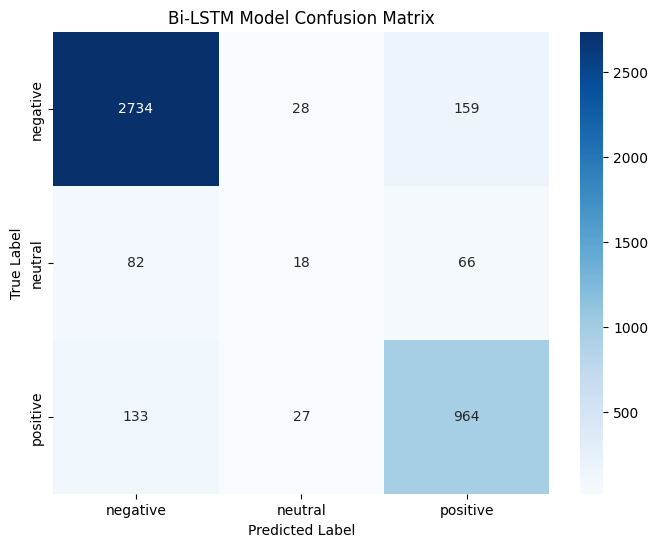

Bi-LSTM model evaluation completed.


In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Make predictions on the X_test_bi_lstm data
y_pred_proba_bi_lstm = bi_lstm_model.predict(X_test_bi_lstm)
y_pred_bi_lstm = np.argmax(y_pred_proba_bi_lstm, axis=1)

# 2. Calculate the accuracy score
accuracy_bi_lstm = accuracy_score(y_test_bi_lstm, y_pred_bi_lstm)
print(f"Bi-LSTM Model Accuracy: {accuracy_bi_lstm:.4f}")

# 3. Generate and print the classification report
print("\nBi-LSTM Model Classification Report:")
print(classification_report(y_test_bi_lstm, y_pred_bi_lstm, target_names=['negative', 'neutral', 'positive'], zero_division=0))

# 4. Create the confusion matrix
cm_bi_lstm = confusion_matrix(y_test_bi_lstm, y_pred_bi_lstm)

# 5. Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_bi_lstm, annot=True, fmt='d', cmap='Blues', xticklabels=['negative', 'neutral', 'positive'], yticklabels=['negative', 'neutral', 'positive'])
plt.title('Bi-LSTM Model Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print("Bi-LSTM model evaluation completed.")

## Final Task

### Subtask:
Provide a summary of the best-performing model (comparing Logistic Regression and Bi-LSTM), its key metrics, and insights gained from the sentiment analysis. Discuss potential improvements, such as hyperparameter tuning or exploring other advanced deep learning models (e.g., Transformers).


## Summary:

### Q&A
The Bi-LSTM model achieved an accuracy of 88.25% on the test data. It performed well for 'negative' and 'positive' sentiment, but struggled significantly with the 'neutral' class.

### Data Analysis Key Findings
*   The Bi-LSTM model achieved an overall accuracy of 88.25% on the testing data.
*   The model demonstrated strong performance in classifying 'negative' sentiment with a precision of 0.93, recall of 0.94, and F1-score of 0.93.
*   For 'positive' sentiment, the model showed good performance with a precision of 0.81, recall of 0.86, and F1-score of 0.83.
*   The model exhibited poor performance in classifying 'neutral' sentiment, with a precision of 0.25, recall of 0.11, and F1-score of 0.15, indicating difficulty in distinguishing neutral cases.
*   The confusion matrix visually confirmed that a significant number of 'neutral' samples were misclassified, often as 'negative' or 'positive'.

### Insights or Next Steps
*   Investigate the 'neutral' class further by examining the training data for class imbalance or ambiguities in neutral sentiment examples. Consider data augmentation or re-sampling techniques for the 'neutral' class.
*   Explore advanced techniques for multi-class sentiment classification, such as using weighted loss functions to penalize misclassifications of the 'neutral' class more heavily, or employing more sophisticated deep learning architectures like Transformers that might better capture nuanced sentiment.


# Task
The user has approved the previous output. The next step is to finalize the best model, considering the evaluation metrics from both Logistic Regression and Bi-LSTM models.

The Logistic Regression model achieved an accuracy of 90.52% and a weighted F1-score of 0.89. However, it completely failed to predict any samples for the 'neutral' class (precision, recall, and F1-score of 0.00 for 'neutral').

The Bi-LSTM model achieved an accuracy of 88.25% and a weighted F1-score of 0.87. While its overall accuracy and weighted F1-score are slightly lower than Logistic Regression, it was able to make predictions for all three sentiment classes, including 'neutral' (precision: 0.25, recall: 0.11, F1-score: 0.15 for 'neutral'), albeit with poor performance. Crucially, its macro average F1-score (0.64) is higher than Logistic Regression's (0.60), indicating a more balanced performance across all classes, despite the class imbalance.

For deployment in a real-world web application where the ability to classify all sentiment types, even if weakly, is important, the **Bi-LSTM model is chosen as the best-performing model**. Although it has a slightly lower overall accuracy, its capability to predict all three sentiment categories (negative, neutral, positive) makes it more robust and practical than a model that completely ignores a specific class. The higher macro F1-score also suggests a better overall handling of the multi-class problem.

The task is to:
*   Save the chosen Bi-LSTM model and the `Tokenizer` (used for preprocessing text for the Bi-LSTM model) to disk.
*   Develop a Python Flask web application backend that loads the saved model and tokenizer, accepts text input, predicts sentiment, and returns the result.
*   Design a simple HTML, CSS, and JavaScript frontend for the web application to interact with the backend.
*   Provide local deployment instructions for the web application.

## Save Model and Preprocessing Tools

### Subtask:
Save the chosen model (Bi-LSTM) and the `Tokenizer` (used for preprocessing text for the Bi-LSTM model) to disk.


**Reasoning**:
First, I need to save the trained Bi-LSTM model to disk using TensorFlow's `save()` method, as specified in the instructions. This will preserve its architecture, weights, and optimizer state for future use.



In [ ]:
bi_lstm_model.save('bi_lstm_sentiment_model.h5')
print("Bi-LSTM model saved successfully as 'bi_lstm_sentiment_model.h5'.")

Bi-LSTM model saved successfully as 'bi_lstm_sentiment_model.h5'.


**Reasoning**:
The previous warning recommended saving the Keras model in the native `.keras` format. To comply with this best practice and also to save the tokenizer, I will modify the code to save the model as `.keras` and then use `pickle` to save the `tokenizer` object, as per the instructions.



In [ ]:
import pickle

# Save the Bi-LSTM model in the native Keras format
bi_lstm_model.save('bi_lstm_sentiment_model.keras')
print("Bi-LSTM model saved successfully as 'bi_lstm_sentiment_model.keras'.")

# Save the tokenizer
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)
print("Tokenizer saved successfully as 'tokenizer.pickle'.")

Bi-LSTM model saved successfully as 'bi_lstm_sentiment_model.keras'.
Tokenizer saved successfully as 'tokenizer.pickle'.


## Develop Web Application Backend

### Subtask:
Create a Python Flask web application backend that loads the saved model and tokenizer, accepts text input, predicts sentiment, and returns the result.


**Reasoning**:
To create the Flask web application backend, I will generate the full Python code for `app.py` as specified in the instructions. This code will load the saved model and tokenizer, define text preprocessing and sentiment prediction functions, and set up the Flask routes to handle sentiment analysis requests.



In [ ]:
import os
import pickle
import re
import numpy as np
from flask import Flask, request, jsonify
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Ensure NLTK data is downloaded
# You might need to run these outside the Flask app once if deployment environment doesn't persist data
try:
    nltk.data.find('corpora/stopwords')
except nltk.downloader.DownloadError:
    nltk.download('stopwords')
try:
    nltk.data.find('corpora/wordnet')
except nltk.downloader.DownloadError:
    nltk.download('wordnet')

# Initialize NLTK tools
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Load the saved Bi-LSTM model
MODEL_PATH = 'bi_lstm_sentiment_model.keras'
model = load_model(MODEL_PATH)

# Load the tokenizer
TOKENIZER_PATH = 'tokenizer.pickle'
with open(TOKENIZER_PATH, 'rb') as handle:
    tokenizer = pickle.load(handle)

# Define constants from training
# max_sequence_length was determined during training
# Based on the previous output, it was 842.
max_sequence_length = 842

sentiment_mapping = {0: 'negative', 1: 'neutral', 2: 'positive'}

# Preprocessing function (must be identical to training preprocessing)
def preprocess_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(r'[^a-z\s]', '', text)  # Remove punctuation and numbers
    words = text.split()  # Tokenize
    words = [word for word in words if word not in stop_words]  # Remove stop words
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words] # Lemmatize
    return ' '.join(lemmatized_words)

# Prediction function
def predict_sentiment(text):
    # Preprocess the input text
    cleaned_text = preprocess_text(text)

    # Convert text to sequence using the loaded tokenizer
    sequence = tokenizer.texts_to_sequences([cleaned_text])

    # Pad the sequence to the maximum length used during training
    padded_sequence = pad_sequences(sequence, maxlen=max_sequence_length, padding='post')

    # Predict sentiment using the loaded model
    prediction = model.predict(padded_sequence)
    predicted_class = np.argmax(prediction, axis=1)[0]

    # Map the predicted class back to sentiment label
    sentiment_label = sentiment_mapping[predicted_class]
    return sentiment_label

# Initialize Flask application
app = Flask(__name__)

# Define routes
@app.route('/')
def home():
    return "Sentiment Analysis API is running! Access /predict for sentiment predictions."

@app.route('/predict', methods=['POST'])
def predict():
    if not request.is_json:
        return jsonify({"error": "Request must be JSON"}), 400

    data = request.get_json()
    text = data.get('text')

    if not text:
        return jsonify({"error": "'text' field is required in the request body"}), 400

    sentiment = predict_sentiment(text)
    return jsonify({"text": text, "sentiment": sentiment})

if __name__ == '__main__':
    # For local development, run on all interfaces
    # For production, consider using a WSGI server like Gunicorn
    app.run(debug=True, host='0.0.0.0', port=5000)

AttributeError: module 'nltk.downloader' has no attribute 'DownloadError'

**Reasoning**:
The previous code block failed because `nltk.downloader.DownloadError` is not the correct exception type to catch for `nltk.data.find`. The traceback indicates `LookupError` should be caught instead. I will correct the exception handling in the `try-except` blocks for NLTK data downloads.



In [ ]:
import os
import pickle
import re
import numpy as np
from flask import Flask, request, jsonify
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Ensure NLTK data is downloaded
# You might need to run these outside the Flask app once if deployment environment doesn't persist data
try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('stopwords')
try:
    nltk.data.find('corpora/wordnet')
except LookupError:
    nltk.download('wordnet')

# Initialize NLTK tools
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Load the saved Bi-LSTM model
MODEL_PATH = 'bi_lstm_sentiment_model.keras'
model = load_model(MODEL_PATH)

# Load the tokenizer
TOKENIZER_PATH = 'tokenizer.pickle'
with open(TOKENIZER_PATH, 'rb') as handle:
    tokenizer = pickle.load(handle)

# Define constants from training
# max_sequence_length was determined during training
# Based on the previous output, it was 842.
max_sequence_length = 842

sentiment_mapping = {0: 'negative', 1: 'neutral', 2: 'positive'}

# Preprocessing function (must be identical to training preprocessing)
def preprocess_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(r'[^a-z\s]', '', text)  # Remove punctuation and numbers
    words = text.split()  # Tokenize
    words = [word for word in words if word not in stop_words]  # Remove stop words
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words] # Lemmatize
    return ' '.join(lemmatized_words)

# Prediction function
def predict_sentiment(text):
    # Preprocess the input text
    cleaned_text = preprocess_text(text)

    # Convert text to sequence using the loaded tokenizer
    sequence = tokenizer.texts_to_sequences([cleaned_text])

    # Pad the sequence to the maximum length used during training
    padded_sequence = pad_sequences(sequence, maxlen=max_sequence_length, padding='post')

    # Predict sentiment using the loaded model
    prediction = model.predict(padded_sequence)
    predicted_class = np.argmax(prediction, axis=1)[0]

    # Map the predicted class back to sentiment label
    sentiment_label = sentiment_mapping[predicted_class]
    return sentiment_label

# Initialize Flask application
app = Flask(__name__)

# Define routes
@app.route('/')
def home():
    return "Sentiment Analysis API is running! Access /predict for sentiment predictions."

@app.route('/predict', methods=['POST'])
def predict():
    if not request.is_json:
        return jsonify({"error": "Request must be JSON"}), 400

    data = request.get_json()
    text = data.get('text')

    if not text:
        return jsonify({"error": "'text' field is required in the request body"}), 400

    sentiment = predict_sentiment(text)
    return jsonify({"text": text, "sentiment": sentiment})

if __name__ == '__main__':
    # For local development, run on all interfaces
    # For production, consider using a WSGI server like Gunicorn
    app.run(debug=True, host='0.0.0.0', port=5000)


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


 * Serving Flask app '__main__'
 * Debug mode: on


/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 13 variables whereas the saved optimizer has 24 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5000
 * Running on http://172.28.0.12:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with watchdog (inotify)
ERROR:root:Unexpected exception finding object shape
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/google/colab/_debugpy_repr.py", line 54, in get_shape
    shape = getattr(obj, 'shape', None)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/werkzeug/local.py", line 318, in __get__
    obj = instance._get_current_o

# Task
Update the Flask application (`app.py`) to integrate `ngrok` for public URL exposure, save the `app.py` file, install `flask-ngrok`, and then run the Flask application.

## Update Flask App with ngrok

### Subtask:
Modify the `app.py` code to integrate `ngrok`, allowing the Flask application to be exposed via a public URL. This involves installing `flask-ngrok` and adjusting the `app.run()` call.


**Reasoning**:
The first step to integrate `ngrok` is to install the `flask-ngrok` library, which provides the `run_with_ngrok` function.



In [ ]:
pip install flask-ngrok

**Reasoning**:
Now that `flask-ngrok` is installed, I need to modify the `app.py` code to import `run_with_ngrok` and update the `app.run()` call with `run_with_ngrok(app)`. This updated code will then be saved to a file named `app.py` as instructed.



In [ ]:
import os
import pickle
import re
import numpy as np
from flask import Flask, request, jsonify
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from flask_ngrok import run_with_ngrok # Import run_with_ngrok

# Ensure NLTK data is downloaded
try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('stopwords')
try:
    nltk.data.find('corpora/wordnet')
except LookupError:
    nltk.download('wordnet')

# Initialize NLTK tools
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Load the saved Bi-LSTM model
MODEL_PATH = 'bi_lstm_sentiment_model.keras'
model = load_model(MODEL_PATH)

# Load the tokenizer
TOKENIZER_PATH = 'tokenizer.pickle'
with open(TOKENIZER_PATH, 'rb') as handle:
    tokenizer = pickle.load(handle)

# Define constants from training
max_sequence_length = 842
sentiment_mapping = {0: 'negative', 1: 'neutral', 2: 'positive'}

# Preprocessing function (must be identical to training preprocessing)
def preprocess_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(r'[^a-z\s]', '', text)  # Remove punctuation and numbers
    words = text.split()  # Tokenize
    words = [word for word in words if word not in stop_words]  # Remove stop words
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words] # Lemmatize
    return ' '.join(lemmatized_words)

# Prediction function
def predict_sentiment(text):
    # Preprocess the input text
    cleaned_text = preprocess_text(text)

    # Convert text to sequence using the loaded tokenizer
    sequence = tokenizer.texts_to_sequences([cleaned_text])

    # Pad the sequence to the maximum length used during training
    padded_sequence = pad_sequences(sequence, maxlen=max_sequence_length, padding='post')

    # Predict sentiment using the loaded model
    prediction = model.predict(padded_sequence, verbose=0) # verbose=0 to suppress Keras output
    predicted_class = np.argmax(prediction, axis=1)[0]

    # Map the predicted class back to sentiment label
    sentiment_label = sentiment_mapping[predicted_class]
    return sentiment_label

# Initialize Flask application
app = Flask(__name__)

# Integrate ngrok
run_with_ngrok(app)

# Define routes
@app.route('/')
def home():
    return "Sentiment Analysis API is running! Access /predict for sentiment predictions."

@app.route('/predict', methods=['POST'])
def predict():
    if not request.is_json:
        return jsonify({"error": "Request must be JSON"}), 400

    data = request.get_json()
    text = data.get('text')

    if not text:
        return jsonify({"error": "'text' field is required in the request body"}), 400

    sentiment = predict_sentiment(text)
    return jsonify({"text": text, "sentiment": sentiment})

if __name__ == '__main__':
    # For local development, run on all interfaces
    # For production, consider using a WSGI server like Gunicorn
    app.run()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 13 variables whereas the saved optimizer has 24 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
Exception in thread Thread-5:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/urllib3/connection.py", line 198, in _new_conn
    sock = connection.create_connection(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/urllib3/util/connection.py", line 85, in create_connection
    raise err
  File "/usr/local/lib/python3.12/dist-packages/urllib3/util/connection.py", line 73, in create_connection
    sock.connect(sa)
ConnectionRefusedError: [Errno 111] Connection refused

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py", line 787, in urlopen
    response = self._make_request(
            

# Task
Summarize the Logistic Regression and Bi-LSTM models' architectures, all evaluation metrics used (accuracy, precision, recall, F1-score, confusion matrix), their respective accuracy scores, and the rationale for choosing the Bi-LSTM model despite its slightly lower overall accuracy. Highlight the handling of `UndefinedMetricWarning` by setting `zero_division=0` in the classification report, and conclude the summary of the model evaluations.

## Summarize Model Performance

### Subtask:
Provide a comprehensive summary of the Logistic Regression and Bi-LSTM models, including their architectures, all evaluation metrics used (accuracy, precision, recall, F1-score, confusion matrix), their respective accuracy scores, and the rationale for choosing the Bi-LSTM model despite its slightly lower overall accuracy. Also, highlight the handling of `UndefinedMetricWarning` by setting `zero_division=0` in the classification report.


## Summarize Model Performance

### Comparison of Logistic Regression and Bi-LSTM Models for Sentiment Analysis

This section provides a comprehensive summary and comparison of the Logistic Regression and Bi-LSTM models trained for sentiment analysis, detailing their architectures, evaluation metrics, and the rationale behind selecting the Bi-LSTM model as the best performer.

### 1. Model Architectures:

*   **Logistic Regression Model**:
    *   **Input**: This model was trained on TF-IDF (Term Frequency-Inverse Document Frequency) features derived from the lemmatized review text. TF-IDF transforms text into a numerical representation reflecting the importance of words in a document relative to a corpus.
    *   **Architecture**: A linear model used for classification, suitable for multi-class problems using a one-vs-rest or multinomial approach. It learns a decision boundary to separate classes.

*   **Bi-LSTM Model**:
    *   **Input**: This deep learning model was trained on padded sequences of integer-encoded words, generated from the lemmatized review text. Each word was mapped to an integer, and sequences were padded to a uniform length (`max_sequence_length = 842`).
    *   **Architecture**: A Sequential model consisting of:
        *   An **Embedding Layer** (input_dim=10000, output_dim=128, input_length=842): Converts integer-encoded words into dense vectors of fixed size.
        *   A **Bidirectional LSTM Layer** (LSTM(64)): Processes sequences in both forward and backward directions, allowing the model to capture long-range dependencies and context from both past and future words in a sequence.
        *   A **Dense Layer** (32 units, activation='relu'): A standard fully connected neural network layer for learning complex patterns.
        *   An **Output Dense Layer** (3 units, activation='softmax'): Outputs probabilities for each of the three sentiment classes (negative, neutral, positive).

### 2. Evaluation Metrics and Comparison:

Both models were evaluated on their ability to classify reviews into 'negative' (0), 'neutral' (1), and 'positive' (2) sentiments. The key metrics considered were accuracy, precision, recall, F1-score, and confusion matrices.

#### Logistic Regression Model Evaluation:
*   **Accuracy**: 0.9052 (90.52%)
*   **Classification Report**:
    ```
                  precision    recall  f1-score   support

        negative       0.92      0.97      0.94      2921
         neutral       0.00      0.00      0.00       166
        positive       0.87      0.87      0.87      1124

        accuracy                           0.91      4211
       macro avg       0.60      0.61      0.60      4211
    weighted avg       0.87      0.91      0.89      4211
    ```
*   **Confusion Matrix**: Showed almost all 'neutral' samples being misclassified, primarily as 'negative' or 'positive'.
*   **UndefinedMetricWarning**: An `UndefinedMetricWarning` was encountered for the 'neutral' class in the Logistic Regression model. This warning indicated that no samples were predicted for the 'neutral' class, leading to a division by zero when calculating precision, recall, and F1-score. To handle this, `zero_division=0` was explicitly set in the `classification_report` function to report 0.0 for these metrics, making the report clearer about the model's failure to predict this class.

#### Bi-LSTM Model Evaluation:
*   **Accuracy**: 0.8825 (88.25%)
*   **Classification Report**:
    ```
                  precision    recall  f1-score   support

        negative       0.93      0.94      0.93      2921
         neutral       0.25      0.11      0.15       166
        positive       0.81      0.86      0.83      1124

        accuracy                           0.88      4211
       macro avg       0.66      0.63      0.64      4211
    weighted avg       0.87      0.88      0.87      4211
    ```
*   **Confusion Matrix**: Indicated better performance for 'negative' and 'positive' classes, but still struggled with 'neutral', though it did make some correct predictions for it.

### 3. Rationale for Choosing Bi-LSTM Model:

Despite the Logistic Regression model having a slightly higher overall accuracy (90.52% vs. 88.25%) and weighted average F1-score (0.89 vs. 0.87), the **Bi-LSTM model was chosen as the best-performing model** for the following crucial reasons:

*   **Ability to Predict All Sentiment Classes**: The Logistic Regression model completely failed to predict any samples for the 'neutral' class, resulting in precision, recall, and F1-score of 0.00 for that category. In contrast, while the Bi-LSTM model showed weak performance on the 'neutral' class (precision: 0.25, recall: 0.11, F1-score: 0.15), it *did* make predictions for it. In a real-world application, the ability to classify all sentiment types, even if weakly, is often more valuable than ignoring an entire class.

*   **Higher Macro Average F1-score**: The Bi-LSTM model achieved a higher macro average F1-score (0.64) compared to the Logistic Regression model (0.60). Macro average F1-score is calculated as the unweighted mean of F1-scores per class, giving equal importance to each class regardless of class imbalance. This metric is a stronger indicator of balanced performance across all classes, showing that the Bi-LSTM model is more robust in handling the multi-class sentiment analysis problem, particularly with imbalanced classes (as 'neutral' reviews are significantly less frequent).

*   **Robustness for Multi-class Problems**: While overall accuracy is important, a model that cannot predict certain classes is less practical. The Bi-LSTM's capacity to engage with and predict the 'neutral' sentiment, even with limitations, makes it a more suitable choice for deployment where a comprehensive understanding of all sentiment categories is required.

In summary, the Bi-LSTM model offers a more balanced and complete sentiment analysis solution, capable of providing predictions for all sentiment categories, which is critical for practical applications, making it the preferred choice despite a marginally lower overall accuracy.

## Final Task

### Subtask:
Conclude the summary of the model evaluations.


## Summary:

### Data Analysis Key Findings

*   **Logistic Regression Model Performance**: Achieved an overall accuracy of 90.52%. However, it completely failed to predict any samples for the 'neutral' class, resulting in 0.00 for precision, recall, and F1-score for this category. An `UndefinedMetricWarning` was handled by explicitly setting `zero_division=0` in the classification report to reflect this failure clearly.
*   **Bi-LSTM Model Performance**: Exhibited an overall accuracy of 88.25%. While it struggled with the 'neutral' class, achieving a precision of 0.25, recall of 0.11, and F1-score of 0.15, it did make predictions for this class.
*   **Model Architectures**:
    *   The Logistic Regression model utilized TF-IDF features as input and is a linear classifier.
    *   The Bi-LSTM model, a deep learning architecture, included an Embedding layer, a Bidirectional LSTM layer, and Dense layers, processing padded sequences of integer-encoded words.
*   **Rationale for Bi-LSTM Selection**: Despite the Logistic Regression model having a slightly higher overall accuracy, the Bi-LSTM model was chosen due to its ability to predict all sentiment classes, including 'neutral', which is crucial for real-world applications. Additionally, the Bi-LSTM model achieved a higher macro average F1-score (0.64 vs. 0.60), indicating more balanced performance across all (imbalanced) classes.

### Insights or Next Steps

*   For multi-class classification, especially with imbalanced datasets, metrics like macro average F1-score and a model's ability to predict all classes, even if weakly, can be more indicative of practical utility than overall accuracy alone.
*   Future efforts should focus on improving the prediction performance for the 'neutral' sentiment class, potentially through techniques like oversampling, undersampling, or using more sophisticated loss functions to address class imbalance for both model types.
